# Probability and distributions: uniform distribution

- more interesting than coin flips

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# uniform random number (from [0,1)])
np.random.random()

0.9840531854509492

In [5]:
# generate a large array of them
randArr = np.random.random((1000,))
print(randArr)

[ 0.43932662  0.92303056  0.95362779  0.02507379  0.83851937  0.35469688
  0.0320268   0.30406117  0.45883142  0.40152035  0.76160598  0.79198227
  0.27431931  0.760312    0.70432578  0.85127965  0.02784033  0.42482476
  0.2569968   0.29446361  0.22716809  0.52394722  0.14830686  0.66193101
  0.24111876  0.35763802  0.54819984  0.18028755  0.20511505  0.26065344
  0.0129208   0.86549528  0.38462112  0.30245392  0.47046773  0.52114798
  0.64455454  0.23260381  0.53381666  0.06041079  0.68502009  0.57370341
  0.01354409  0.89999626  0.64444706  0.24819795  0.64366703  0.96643648
  0.7465468   0.90491128  0.83019648  0.48611479  0.50787884  0.1105018
  0.48140581  0.35895768  0.8425198   0.51873404  0.78455673  0.58223607
  0.42087894  0.23228898  0.38342084  0.00972764  0.66142659  0.77784459
  0.00397615  0.49816531  0.46996638  0.20360328  0.9385943   0.14654952
  0.14598159  0.89273158  0.15812949  0.5350867   0.97646967  0.82916241
  0.41132515  0.05288579  0.20432874  0.78283273  0.

In [11]:
np.set_printoptions(threshold=20)
print(randArr)

[ 0.43932662  0.92303056  0.95362779 ...,  0.9701673   0.52093017
  0.37186804]


## Use plots to look at it

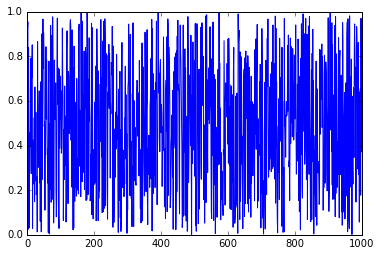

In [12]:
plt.plot(randArr)

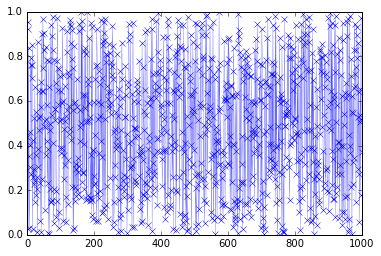

In [17]:
plt.plot(randArr, marker='x', linewidth=0.2)

## Histogram

(array([  976.,  1024.,   996.,  1042.,  1013.,   971.,   991.,  1009.,
         1004.,   974.]),
 array([  1.97123596e-04,   1.00176522e-01,   2.00155920e-01,
          3.00135319e-01,   4.00114717e-01,   5.00094115e-01,
          6.00073514e-01,   7.00052912e-01,   8.00032310e-01,
          9.00011709e-01,   9.99991107e-01]),
 <a list of 10 Patch objects>)

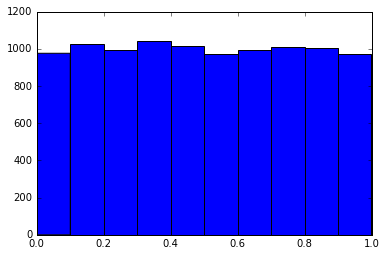

In [19]:
bigArr = np.random.rand(10000,)
plt.hist(bigArr)

In [21]:
# mean
#np.mean(bigArr)
# measures of spread
#np.var(bigArr)
#np.std(bigArr)


0.082669412334539741

## SEM and confidence intervals


In [22]:
nPts = len(bigArr)
sem = np.std(bigArr)/np.sqrt(nPts)
print(nPts)
print(sem)

10000
0.00287522890105


In [29]:
# no equation, so we simulate the 95% CI for the mean
nReps = 1000
nPts = 1000
meanV = np.zeros((nReps,))*np.nan
# meanV here?
for iR in range(nReps):
    tArr = np.random.random((nPts,))
    meanV[iR] = np.mean(tArr)



print(np.percentile(meanV,[2.5, 97.5]))

    


[ 0.48270442  0.5174354 ]


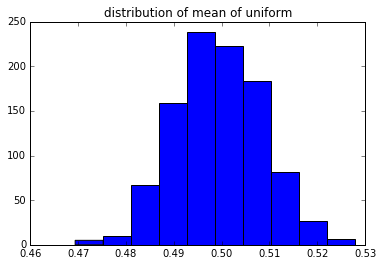

In [39]:
plt.hist(meanV)
plt.title('distribution of mean of uniform')

# Normal dist

In [49]:
#samples
normArr = np.random.normal(loc=5.0, scale=10.0, size=(1000,))


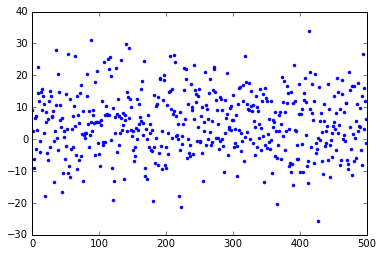

In [50]:
plt.plot(normArr[0:500], '.')

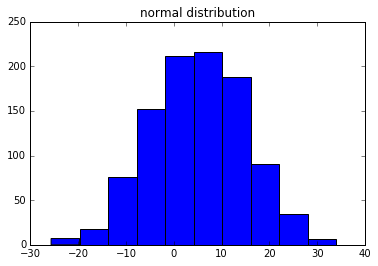

In [51]:
plt.hist(normArr)
plt.title('normal distribution')

In [52]:
mu = np.mean(normArr)

In [54]:
np.std(normArr)

9.8207158908412904

In [55]:
sem = np.std(normArr)/np.sqrt(len(normArr))
print(sem)

0.310558304685


**Equation for the 95% CI from a SEM, assuming data are normally distributed**

$$CI_{95} = {mean} \pm 1.96*SEM$$

In [56]:
CI_95 = (mu - 1.96*sem, mu + 1.96*sem)
print(CI_95)

(4.3985522253596905, 5.6159407797236369)


In [ ]:
# simulate and see if we get it right
nReps = 1000
nPts = 1000
meanV = np.zeros((nReps,))*np.nan
# meanV here?
for iR in range(nReps):
    tArr = np.random.normal(5, 10, (nPts,))
    meanV[iR] = np.mean(tArr)



print(np.percentile(meanV,[2.5, 97.5]))

### SEM as a function of number of trials

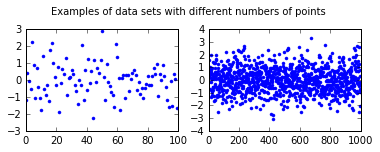

In [73]:
data1 = np.random.normal(0,1,100)
data2 = np.random.normal(0,1,1000)

gs = mpl.gridspec.GridSpec(2,2)
figH = plt.figure()
axH = plt.subplot(gs[0,0])
plt.plot(data1,'.')
axH = plt.subplot(gs[0,1])
plt.plot(data2,'.')
plt.suptitle('Examples of data sets with different numbers of points')


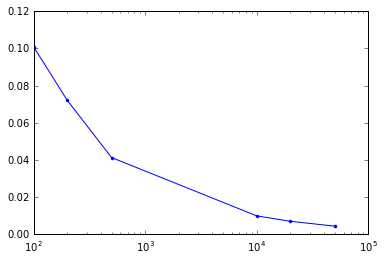

In [81]:
xvals = [100,200,500,10000,20000,50000]
semV = np.zeros(len(xvals))
for (iX,tX) in enumerate(xvals):
    semV[iX] = np.std(np.random.normal(0,1,[tX,]))/np.sqrt(tX)
#plt.plot(semV,'.-')
#plt.plot(xvals, semV,'.-')
3plt.gca().set_xscale('log')

## Hist vs CDF

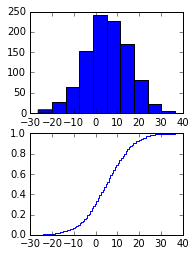

In [68]:
import statsmodels.api as sm # recommended according to the docs

gs = mpl.gridspec.GridSpec(2,2)
figH = plt.figure()
axH = plt.subplot(gs[0,0])
plt.hist(tArr)
xmin,xmax = axH.get_xlim()

axH = plt.subplot(gs[1,0])
xvals = np.linspace(xmin, xmax, 100)
p = sm.distributions.ECDF(tArr)(xvals)
plt.step(xvals,p)




## Probability (combinatorics)
- Fair coin: 
  - prob of heads, tails?
- Biased coin: heads 0.2, tails?
  - probability of 2 tails in a row?
  - probability of 10 tails in a row?
- 4 sided die:
  - probability of rolling a 1
  - probability of rolling sum 3